# Deep Q-Network (DQN) - Lunar Lander - Solved
---
A DQN Agent has been implemented for solving the following environments/tasks:
    
    OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

import gym #OpenAI gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import sys
print("Python version info:", sys.version_info)
print("gym version:" , gym.__version__)
print("Pytorch version:", torch.__version__)

Python version info: sys.version_info(major=3, minor=6, micro=13, releaselevel='final', serial=0)
gym version: 0.26.2
Pytorch version: 1.0.0


### 2. Instantiate the Environment and Agent

In [12]:
env = gym.make('LunarLander-v2',render_mode="human")
env.action_space.seed(42)

#env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


### Visualize the environment. Actions are created out of an untrained DQN network

In [13]:
from dqn_agent_lunarlander import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state, info  = env.reset()

for j in range(1000):
    action = agent.act(state)
    env.render()
    state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        state, info = env.reset()
        # break
        
env.close()

### 3. Train the Agent with DQN

Train the agent from scratch. 

Episode 100	Average Score: -178.35
Episode 200	Average Score: -121.65
Episode 300	Average Score: -41.959
Episode 400	Average Score: 18.473
Episode 500	Average Score: 80.45
Episode 600	Average Score: 154.59
Episode 700	Average Score: 174.27
Episode 800	Average Score: 194.33
Episode 839	Average Score: 200.71
Environment solved in 739 episodes!	Average Score: 200.71


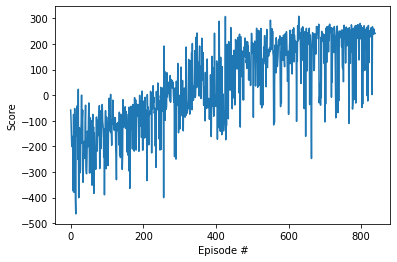

In [16]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state, info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint1_Lunarlander.pth')
            break
    return scores

env = gym.make('LunarLander-v2')
state, info  = env.reset()
scores = dqn()

env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


### 4. Watch a Smart Agent!

Load the trained weights from file to watch a smart agent!

In [22]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint1_Lunarlander.pth'))

env = gym.make('LunarLander-v2',render_mode="human")
state, info  = env.reset()

for i_episode in range(5): # 5 episodes
    state, info = env.reset()
    for j in range(400): # each episode will see 400 actions unless terminated or truncated 
        action = agent.act(state)
        env.render()
        state, reward, terminated, truncated, info = env.step(action)
        if terminated or truncated:
            break
            
env.close()